In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [2]:
root1 = '../Clogard_image_processing/Yes'
yes_print = os.listdir(root1)

root2 = '../Clogard_image_processing/No'
no_print = os.listdir(root2)

In [3]:
len(yes_print)

115

In [4]:
len(no_print)

113

Creating Labels for the two class of Images

yes_print --> 1

no_print --> 0

In [5]:
# create the labels

yes_labels = [1]*115
no_labels = [0]*113

labels = yes_labels + no_labels

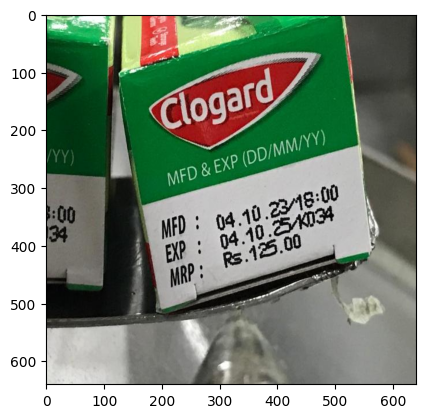

In [6]:
# displaying print image

img = mpimg.imread('../Clogard_image_processing/Yes/yes (109).jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1) Resize the Images

2) Convert the images to numpy arrays

In [7]:
# convert images to numpy arrays+

root1 = '../Clogard_image_processing/Yes'
yes_print = os.listdir(root1)


data = []

for img_file in yes_print:

  image = Image.open(root1+"/"+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


root2 = '../Clogard_image_processing/No'
no_print = os.listdir(root2)


for img_file in no_print:

  image = Image.open(root2+"/"+ img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [8]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [9]:
print(X.shape)
print(Y.shape)

(228, 128, 128, 3)
(228,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [11]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Build a Convolutional Neural Networks (CNN)

In [13]:
import tensorflow as tf
from tensorflow import keras

In [14]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [15]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [17]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)

Epoch 1/15
6/6 [==============================] - 2s 343ms/step - loss: 0.6596 - acc: 0.6196 - val_loss: 0.6418 - val_acc: 0.6842
Epoch 2/15
6/6 [==============================] - 2s 301ms/step - loss: 0.6093 - acc: 0.6933 - val_loss: 0.6211 - val_acc: 0.6316
Epoch 3/15
6/6 [==============================] - 2s 291ms/step - loss: 0.5598 - acc: 0.7178 - val_loss: 0.5523 - val_acc: 0.7368
Epoch 4/15
6/6 [==============================] - 2s 286ms/step - loss: 0.5010 - acc: 0.7914 - val_loss: 0.5375 - val_acc: 0.6842
Epoch 5/15
6/6 [==============================] - 2s 307ms/step - loss: 0.4470 - acc: 0.8098 - val_loss: 0.6266 - val_acc: 0.5789
Epoch 6/15
6/6 [==============================] - 2s 301ms/step - loss: 0.3451 - acc: 0.8773 - val_loss: 0.4403 - val_acc: 0.7895
Epoch 7/15
6/6 [==============================] - 2s 306ms/step - loss: 0.3787 - acc: 0.8160 - val_loss: 0.3787 - val_acc: 0.8421
Epoch 8/15
6/6 [==============================] - 2s 306ms/step - loss: 0.2008 - acc: 0.93

In [18]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

2/2 [==============================] - 0s 37ms/step - loss: 0.0967 - acc: 0.9565
Test Accuracy = 0.95652174949646


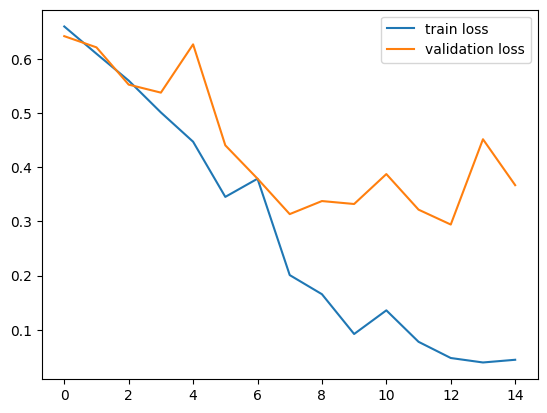

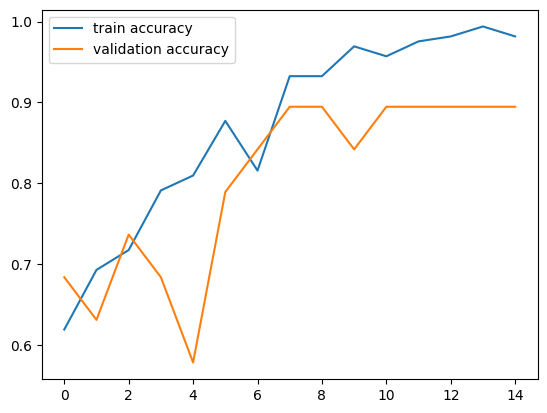

In [19]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: ../Clogard_image_processing/Yes/yes (109).jpg
1/1 [==============================] - 0s 22ms/step
[[2.0601465e-05 9.9999189e-01]]
1
Print is Correct


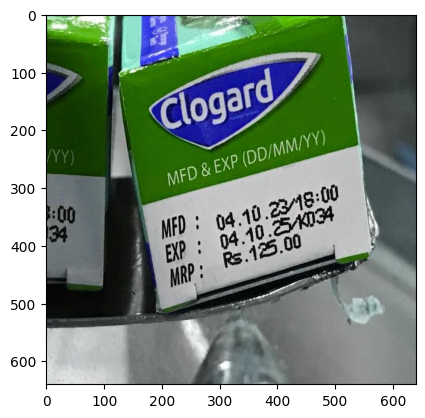

In [24]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)  

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('Print is Correct')

else:

  print('Print is Wrong')

In [26]:
import pickle

with open('../static/model/model.pickle','wb') as file:
    pickle.dump(history,file)